Requirements

We will be creating a new dataset from the data in 'assignment_seven.csv' that applies the following criteria:

* we must remove all real names from the dataset
* If there is a missing entry for any field in a given row, remove that row from the dataset
* Output a new dataset file called 'output.csv', which you will attach to this assignment for submission

 

[EXTRA CREDIT] 
* discover and rank the top five products that customers bought
* Extra, extra credit: create a visualization of the ranking

In [13]:
import pandas as pd
import matplotlib as plt 
df = pd.read_csv('assignment_seven.csv')
df.head()

,transaction_id,transaction_date,full_name,record_id,products
0,1,7/19/2021,Izzy Janssens,1df9f42a-8c0f-4e3d-aeca-5bd310dd277a,TERBUTALINE SULFATE
1,2,9/25/2021,Timmy Sanches,afaf2462-41b1-43dc-8702-264cf2a6ade0,Fentanyl
2,3,10/7/2021,Skyler Rawlcliffe,34528325-deb3-4deb-9107-12a89f5d1cfc,Lorazepam
3,4,5/26/2022,Torrance Petteford,6e379186-e61e-4926-ad03-0ac7759d7fab,risperidone
4,5,12/17/2021,Bendite Fardon,b0eb4c68-5737-4076-856d-7eacf2e6014d,Oxygen


We'll drop the names, then any n/a's

In [14]:
dc = df.drop(['full_name'], axis=1)

dc = dc.dropna()

dc.head()

,transaction_id,transaction_date,record_id,products
0,1,7/19/2021,1df9f42a-8c0f-4e3d-aeca-5bd310dd277a,TERBUTALINE SULFATE
1,2,9/25/2021,afaf2462-41b1-43dc-8702-264cf2a6ade0,Fentanyl
2,3,10/7/2021,34528325-deb3-4deb-9107-12a89f5d1cfc,Lorazepam
3,4,5/26/2022,6e379186-e61e-4926-ad03-0ac7759d7fab,risperidone
4,5,12/17/2021,b0eb4c68-5737-4076-856d-7eacf2e6014d,Oxygen


In [15]:
dc.to_csv('cleansed.csv')

Extra credit:
discover and rank the top five products that customers bought, plot the top 5. 
Start by isolating our products ordered and checking what we have.

In [16]:
orders = dc['products']

orders.head(20)

0                           TERBUTALINE SULFATE
1                                      Fentanyl
2                                     Lorazepam
3                                   risperidone
4                                        Oxygen
5                                  Levofloxacin
6     yellow jacket hymenoptera venom multidose
7         Amoxicillin and Clavulanate Potassium
8                            POTASSIUM CHLORIDE
9                                   Simvastatin
10                                    Triclosan
12        Glipizide and Metformin Hydrochloride
13                  Medroxyprogesterone Acetate
14                                Chloroxylenol
15                            Phenylephrine HCl
16                                Chlorzoxazone
17          Levmetamfetamine Nasal Decongestant
18                                       Oxygen
19                                 Azathioprine
20    Chelidonium majus, Echinacea angustifolia
Name: products, dtype: object

From what we have, I'm going to make the assumption that our dataset are orders by patients from a pharmacy. The order records seem to be mixed in single item orders and multiple item orders delimited by ','. Some entries have 'and' but that seems to be part of the name of product, such as 'Glipizide and Metformin Hydrochloride' which is single diabetes medication or 'Amoxicillin and Clavulanate Potassium' which is another single anti-infection medication.

__Assuming onwards that multiple products will be delimited by commas and not 'and'.__

Procedure
* split df between orders with single product orders (spo) and those with multiple products (mpo)
* convert mpo into spo format by splitting on delimiter and then exploding
* append exploded mpo onto spo
* convert all entries to lowercase to 
* count occurences with value_counts() and plot

In [17]:
spo = orders[~orders.str.contains(', ')]
mpo = orders[orders.str.contains(', ')]

mpoconverted = mpo.str.split(pat=', ').explode()

total = pd.concat([spo, mpoconverted], ignore_index=True)
total = total.str.lower()

octinoxate          35
acetaminophen       34
titanium dioxide    29
avobenzone          19
alcohol             18
Name: products, dtype: int64


<AxesSubplot:>

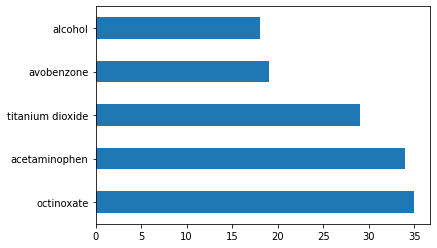

In [18]:
print(total.value_counts()[:5])
total.value_counts()[:5].plot(kind='barh')